In [2]:
import pandas as pd
import numpy as np
import pylab as plt
%matplotlib inline

# Goals of the analysis
We want to answer questions like:

How many views do our trending videos have? Do most of them have a large number of views? Is having a large number of views required for a video to become trending?
The same questions above, but applied to likes and comment count instead of views.
Which video remained the most on the trendin-videos list?
How many trending videos contain a fully-capitalized word in their titles?
What are the lengths of trending video titles? Is this length related to the video becoming trendy?
How are views, likes, dislikes, comment count, title length, and other attributes correlate with (relate to) each other? How are they connected?
What are the most common words in trending video titles?
Which YouTube channels have the largest number of trending videos?
Which video category (e.g. Entertainment, Gaming, Comedy, etc.) has the largest number of trending videos?
When were trending videos published? On which days of the week? at which times of the day?


In [3]:
df = pd.read_csv('CAvideos.csv')

In [4]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
video_id                  40881 non-null object
trending_date             40881 non-null object
title                     40881 non-null object
channel_title             40881 non-null object
category_id               40881 non-null int64
publish_time              40881 non-null object
tags                      40881 non-null object
views                     40881 non-null int64
likes                     40881 non-null int64
dislikes                  40881 non-null int64
comment_count             40881 non-null int64
thumbnail_link            40881 non-null object
comments_disabled         40881 non-null bool
ratings_disabled          40881 non-null bool
video_error_or_removed    40881 non-null bool
description               39585 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [6]:
df.isna().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64

In [7]:
df['description']=df['description'].fillna(value = '')

In [8]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [9]:
df.isna().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

In [10]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40881.000000,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04
mean,20.795553,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03
std,6.775054,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02
50%,24.000000,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03
75%,24.000000,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06


In [11]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.139610,-0.144363,-0.028731,-0.068848,0.038741,0.018377,-0.030002
views,-0.139610,1.000000,0.828964,0.557621,0.693107,0.004424,0.005745,0.001928
likes,-0.144363,0.828964,1.000000,0.460427,0.836585,-0.023057,-0.024729,0.001953
dislikes,-0.028731,0.557621,0.460427,1.000000,0.643494,-0.005282,-0.008762,0.000636
comment_count,-0.068848,0.693107,0.836585,0.643494,1.000000,-0.028109,-0.016602,0.003117
comments_disabled,0.038741,0.004424,-0.023057,-0.005282,-0.028109,1.000000,0.147903,-0.003092
ratings_disabled,0.018377,0.005745,-0.024729,-0.008762,-0.016602,0.147903,1.000000,-0.002131
video_error_or_removed,-0.030002,0.001928,0.001953,0.000636,0.003117,-0.003092,-0.002131,1.000000


In [12]:
df['trending_date'].apply(lambda x: '20' + x[:2]).value_counts()

2018    31289
2017     9592
Name: trending_date, dtype: int64

In [13]:
import seaborn as sns

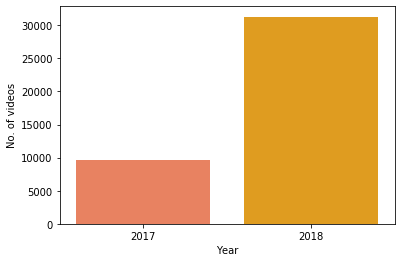

In [14]:
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")


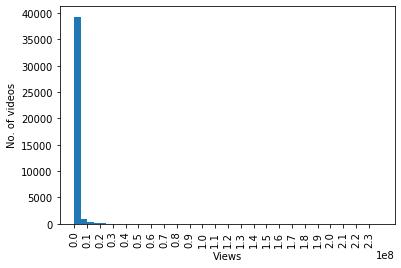

In [15]:
#let's plot a histogram for the views column to take a look at its distribution: 
#to see how many videos have between 10 million and 20 million views,
#how many videos have between 20 million and 30 million views, and so on.


fig, ax = plt.subplots()
_ = sns.distplot(df["views"], kde=False, 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

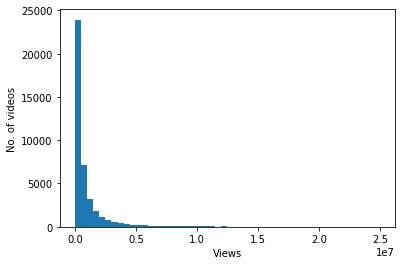

In [16]:
#Now let us plot the histogram just for videos
#with 25 million views or less to get a closer look at the distribution of the data.

fig, ax = plt.subplots()
_ = sns.distplot(df[df["views"] <= 25e6]["views"], kde=False, 
             hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")

In [17]:
# to know the videos with more than 1million views

df[df['views'] < 1e6]['views'].count() / df['views'].count() * 100


75.8200631100022

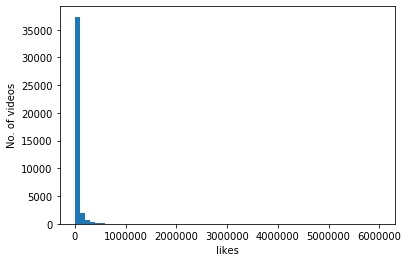

In [18]:

fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 25e6]["likes"], kde=False, 
             hist_kws={'alpha': 1},bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="likes", ylabel="No. of videos")

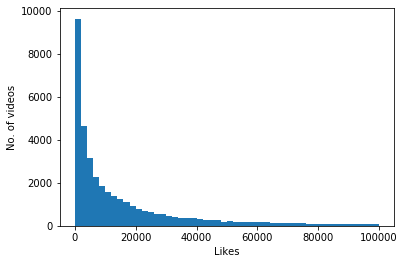

In [19]:
#We note that the vast majority of trending videos have between 0 and 100,000 likes. 
#Let us plot the histogram just for videos with 1000,000 likes or less to get a closer look at the distribution of the data


fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 1e5]["likes"], kde=False, 
                   hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

In [22]:
#vvideos less than 50k likes
df[df['likes'] < 5e4]['likes'].count() / df['likes'].count() * 100

83.7699664880996

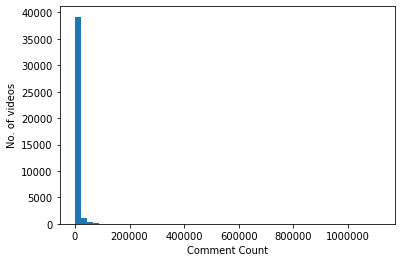

In [21]:
# comment count

fig, ax = plt.subplots()
_ = sns.distplot(df["comment_count"], kde=False, rug=False, 
                  hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

In [23]:
#videos less than 25k comments

df[df['comment_count'] < 2.5e3]['comment_count'].count() / df['comment_count'].count() * 100

66.31687091803038

In [26]:
df.describe(include = ['O'])

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40881,40881,40881,40881,40881,40881,40881,40881
unique,24427,205,24573,5076,23613,20157,24422,22346
top,l_lblj8Cq0o,17.15.11,Most Popular Violin Covers of Popular Songs 20...,SET India,2017-12-20T23:00:00.000Z,[none],https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,
freq,8,200,15,192,11,2385,8,1296


In [27]:
#To verify our interpretation for title column,
#let's take a look at an example where a trending video appeared more than once on the trending list but with different titles


grouped = df.groupby("video_id")
groups = []
wanted_groups = []
for key, item in grouped:
    groups.append(grouped.get_group(key))

for g in groups:
    if len(g['title'].unique()) != 1:
        wanted_groups.append(g)

wanted_groups[0]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
4266,-IuqwJiuuj0,17.05.12,Sau Ánh Hào Quang | Tập 10 FULL: Lê Giang và b...,ĐÔNG TÂY PROMOTION OFFICIAL,24,2017-12-04T15:09:14.000Z,"sau anh hao quang|""sau ánh hào quang""|""sau anh...",742343,7407,399,1551,https://i.ytimg.com/vi/-IuqwJiuuj0/default.jpg,False,False,False,Sau Ánh Hào Quang | Tập 10 FULL: Lê Giang và b...
4534,-IuqwJiuuj0,17.06.12,Sau Ánh Hào Quang | Tập 10 FULL: Trấn Thành th...,ĐÔNG TÂY PROMOTION OFFICIAL,24,2017-12-04T15:09:14.000Z,"sau anh hao quang|""sau ánh hào quang""|""sau anh...",1204074,10003,578,2020,https://i.ytimg.com/vi/-IuqwJiuuj0/default.jpg,False,False,False,Sau Ánh Hào Quang | Tập 10 FULL: Lê Giang và b...


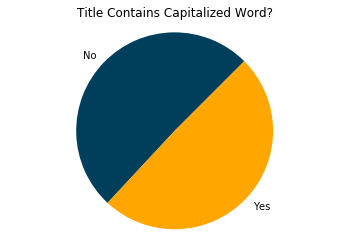

In [33]:
# in order to know the vidoes with capitalized words acccording to client requirement

def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

In [37]:
df["contains_capitalized"].value_counts(normalize=True)

False    0.505712
True     0.494288
Name: contains_capitalized, dtype: float64

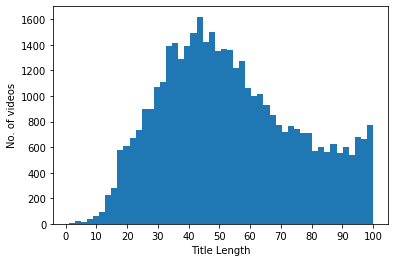

In [39]:
# creating a new variable title_length in order to check lenght of titles and whwther it contributes for a video to trend

df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                  hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

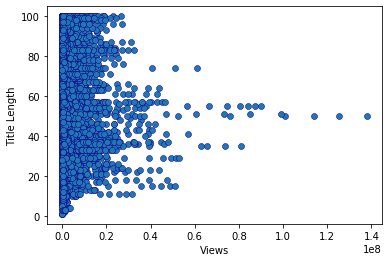

In [46]:
# scatter plot between views and title_length to check whwther it contributes in trending of any video

fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], edgecolors="#110087", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

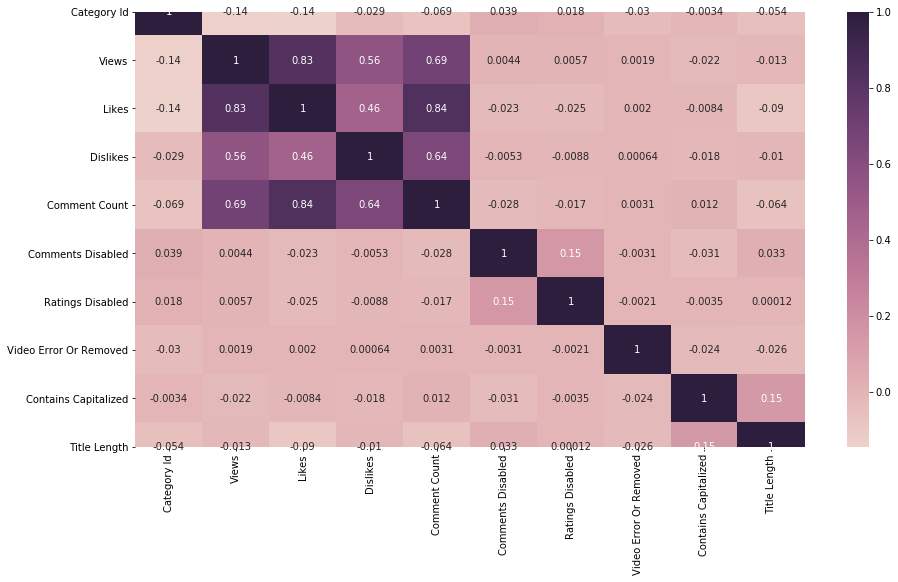

In [52]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(15,8))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

In [60]:
from collections import Counter
import datetime
import wordcloud
import json

In [61]:
#count of most commmon words

title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('-', 12666),
 ('|', 12596),
 ('The', 5167),
 ('2018', 3765),
 ('the', 2498),
 ('Episode', 2298),
 ('&', 2286),
 ('to', 1903),
 ('in', 1797),
 ('of', 1774),
 ('and', 1699),
 ('A', 1522),
 ('on', 1383),
 ('To', 1316),
 ('a', 1279),
 ('2017', 1202),
 ('with', 1200),
 ('vs', 1177),
 ('Game', 1094),
 ('Full', 1056),
 ('2', 1030),
 ('Trump', 962),
 ('I', 938),
 ('In', 930),
 ('Official', 930)]

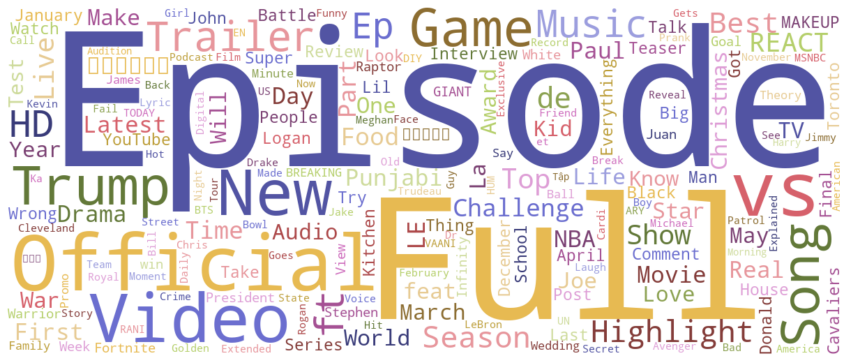

In [62]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

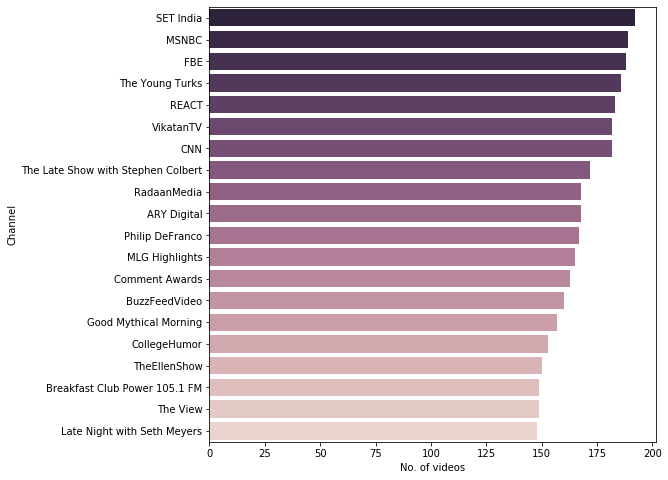

In [63]:
#Which YouTube channels have the largest number of trending videos?

cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")


In [65]:
#When were trending videos published? On which days of the week? at which times of the day?

df["publishing_day"] = df["publish_time"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publish_time"].apply(lambda x: x[11:13])
df.drop(labels='publish_time', axis=1, inplace=True)


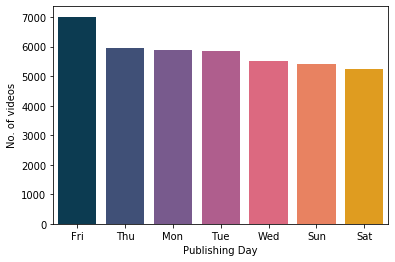

In [66]:
cdf = df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")

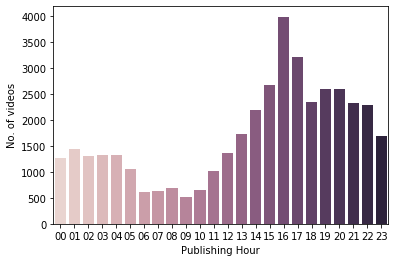

In [67]:
cdf = df["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

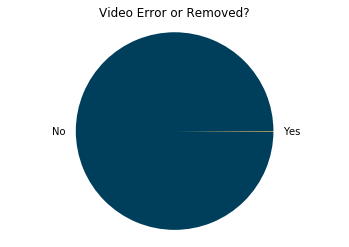

In [68]:
# to know how many videos got error or removed

value_counts = df["video_error_or_removed"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Video Error or Removed?')

In [69]:
df['comments_disabled'].value_counts()

False    40298
True       583
Name: comments_disabled, dtype: int64

In [71]:
df['ratings_disabled'].value_counts()

False    40602
True       279
Name: ratings_disabled, dtype: int64

In [72]:
# how many videos got both comments and ratings got disabled
len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)


63